In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [16]:
df=pd.read_csv('height-weight.csv')

In [18]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


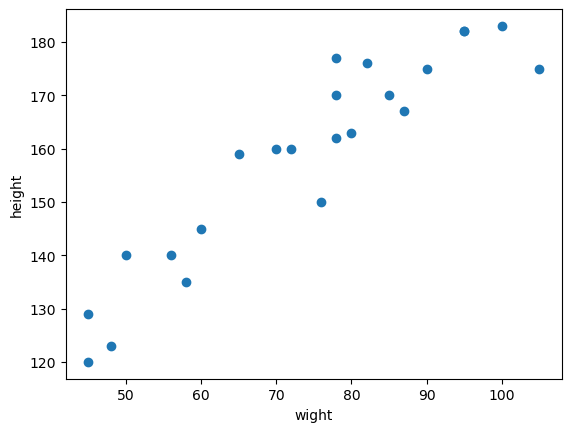

In [24]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('wight')
plt.ylabel('height')
plt.show()


In [26]:
##corealtion
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [42]:
##seaborn
sns.pairplot(df)





In [60]:
##indepent and dependet features
X=df[['Weight']] ##independet variable should be in 2D arrya or data frame
y=df['Height'] ## this variable can be in series or 1d


In [68]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
X_train.shape

(17, 1)

In [72]:
 ##standaization 
from sklearn.preprocessing import StandardScaler

In [192]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
## makes sure your test data is scaled exactly like training data
##👉 helps the model make accurate and fair predictions

In [86]:
X_test=scaler.transform(X_test)
"""👉 The computer learns how to scale your training data.
It calculates:

Mean (average value)

Standard deviation (spread)

Then it uses them to make all training data centered around 0.

Example:

Age mean = 35

Salary mean = 50,000

After scaling, both features become small numbers like:"""

'👉 The computer learns how to scale your training data.\nIt calculates:\n\nMean (average value)\n\nStandard deviation (spread)\n\nThen it uses them to make all training data centered around 0.\n\nExample:\n\nAge mean = 35\n\nSalary mean = 50,000\n\nAfter scaling, both features become small numbers like:'

In [88]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [90]:
##apply linear regression
from sklearn.linear_model import LinearRegression


In [106]:
regression=LinearRegression(n_jobs=-1)

In [188]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [118]:
print("coefficient or slope:",regression.coef_)
print("intercept:",regression.intercept_)

coefficient or slope: [17.2982057]
intercept: 156.47058823529412


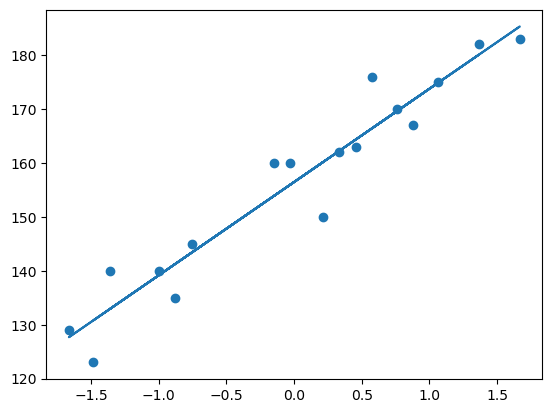

'The straight line comes from the predicted y values\ncalculated using the model’s learned equation'

In [140]:
##plot training data plot best fit line
plt.scatter(X_train,y_train)

plt.plot(X_train,regression.predict(X_train))
plt.show()
"""The straight line comes from the predicted y values
calculated using the model’s learned equation"""

In [142]:
##predication of test data
y_pred=regression.predict(X_test) ## predicated value of our model 

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [150]:
mse=mean_squared_error(y_test,y_pred) ## ytest is the actual y value 
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


R square 
formula 
R^2=1-ssr/sst
r^2=coefficeient of determination ssr=sum of squares of residuals sst=total sum of squrares


In [153]:
from sklearn.metrics import r2_score

In [155]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


adusted R2=1-[(1-R2)*(n-1)(n-k-1)]
where :
R2 the R2 of the model n:the number of observations k : the number of predictor varibles

In [160]:
## display adjusted R-squared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [164]:
##ols linear regression 
import statsmodels.api as sm

In [166]:
model =sm.OLS(y_train,X_train).fit()

In [174]:
prediction=model.predict(X_test)
print(prediction)
"""Your OLS linear regression model used the relationships it learned from training data (X_train, y_train)
and is now predicting y values for new inputs (X_test).

So, the model is saying:

“Based on your input features, I think these are the predicted output values.”
"""

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


'Your OLS linear regression model used the relationships it learned from training data (X_train, y_train)\nand is now predicting y values for new inputs (X_test).\n\nSo, the model is saying:\n\n“Based on your input features, I think these are the predicted output values.”\n'

In [176]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 01 Nov 2025   Prob (F-statistic):                       0.664
Time:                        07:05:31   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\chend\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [194]:
## how to do predication using new data 
regression.predict(scaler.transform([[72]])) ## wegith should be in 2d array we are prediction the height of a person of weeight 72
                           ## we are getting some big value do standarstization

array([1401.94139895])